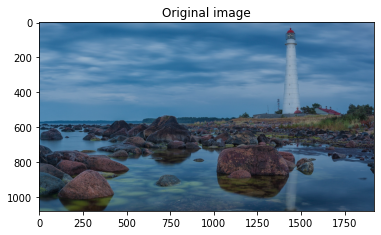

2073600


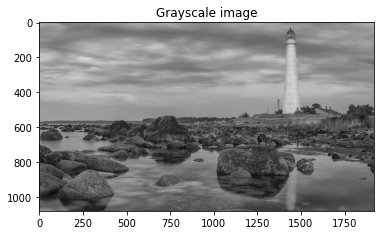

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\nihu\desktop\python\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Nihu\AppData\Local\Temp/ipykernel_17992/288000854.py", line 64, in hsv_rgb
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
cv2.error: OpenCV(4.5.3) c:\users\runneradmin\appdata\local\temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x2f9e5da8::Set<3,-1,-1>,struct cv::impl::A0x2f9e5da8::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1



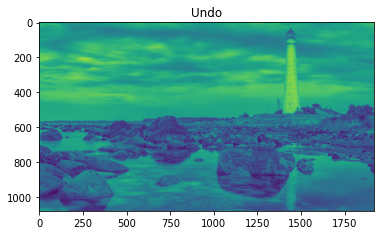

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\nihu\desktop\python\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Nihu\AppData\Local\Temp/ipykernel_17992/288000854.py", line 64, in hsv_rgb
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
cv2.error: OpenCV(4.5.3) c:\users\runneradmin\appdata\local\temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x2f9e5da8::Set<3,-1,-1>,struct cv::impl::A0x2f9e5da8::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\nihu\desktop\python\lib\tkinter\__init__.py", line

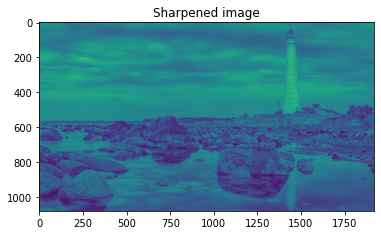

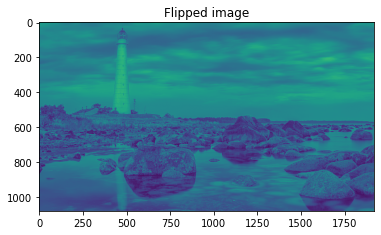

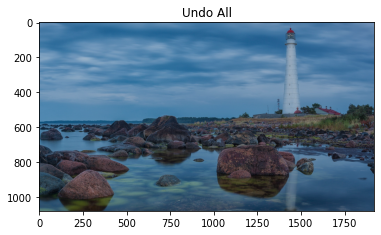

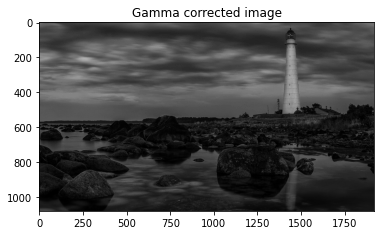

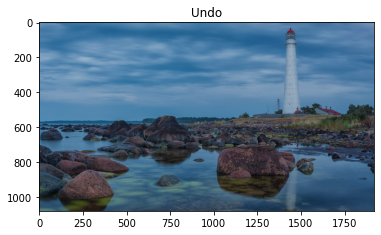

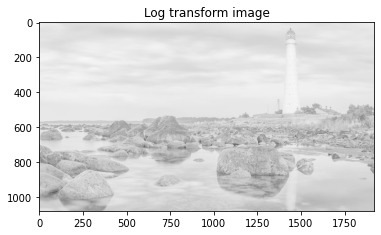

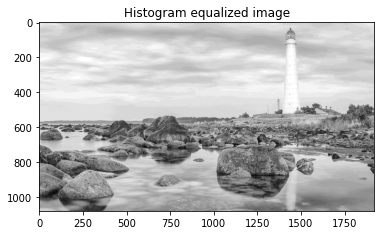

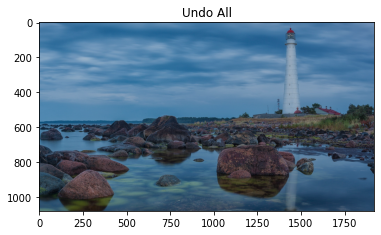

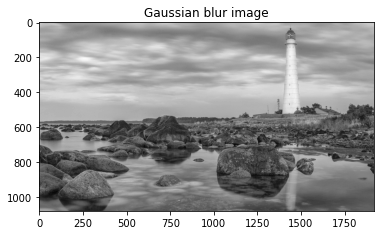

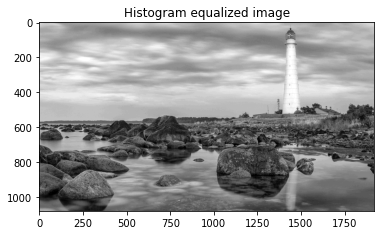

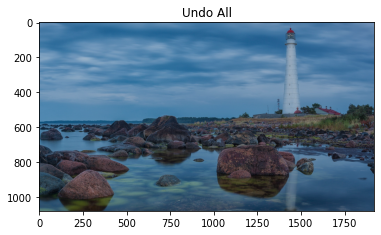

In [ ]:
from tkinter import *
from tkinter import filedialog
from PIL import ImageTk,Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
root=Tk()   

def image_open():
    global img
    #enter file path and open
    root.filename=filedialog.askopenfilename(initialdir="/Users/Nihu/Desktop", title="Select file",
                                                   filetypes=(("jpg files", "*.jpg"), ("all files", "*.*")))
    img=cv2.imread(root.filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    global original_image
    original_image=img
    global previous_img
    previous_img=img
    plt.figure(1)
    plt.title("Original image")
    plt.imshow(img)
    plt.show()
    img1=Image.fromarray(img)
    img1.show()
    img1=ImageTk.PhotoImage(img1)
    label=Label(image=img1).pack()
      
button = Button(root,text="Open Image", command=image_open).pack()


def area():
    global original_image
    image=Image.fromarray(original_image)
    width,height=image.size
    area=width*height
    print(area)
    
button1= Button(root,text="Display area", command=area).pack()


def grayscale_image():
    global img
    global previous_img
    previous_img=img
    grayscale=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.figure(2)
    plt.title("Grayscale image")
    plt.imshow(grayscale,cmap='gray')
    plt.show()
    img=grayscale
    grayscale=Image.fromarray(grayscale)
    grayscale.show()
    grayscale=ImageTk.PhotoImage(grayscale)
    label=Label(image=grayscale).pack()
    

button2= Button(root,text="Grayscale", command=grayscale_image).pack()

def hsv_rgb():
    global img
    global previous_img
    previous_img=img
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    (h,s,v)=cv2.split(hsv)                #split channels
    value=np.array(v)
    value=value+40                          #change value
    merge=cv2.merge([h,s,value])            #merge the channels
    rgb=cv2.cvtColor(merge,cv2.COLOR_HSV2RGB)
    plt.figure(3)
    plt.title("HSV to RGB with v manipulated image")
    plt.imshow(rgb)
    plt.show()
    img=rgb
    rgb=Image.fromarray(rgb)
    rgb.show()
    rgb=ImageTk.PhotoImage(rgb)
    label=Label(image=rgb).pack()

    
button3= Button(root,text="HSV", command=hsv_rgb).pack()

def histogram_equalization():
    global img
    global previous_img
    previous_img=img
    he=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) 

        
    n = np.zeros((256,),dtype=np.float16)
    s = np.zeros((256,),dtype=np.float16)

    height,width=he.shape
  
    #finding histogram
    for i in range(width):
        for j in range(height):
            h = he[j,i]
            n[h] = n[h]+1  
        
    #performing histogram equalization
    tp = 1.0/(height*width)
    s= np.zeros((256,),dtype=np.float16)

    for i in range(256):
        for j in range(i+1):
            s[i] += n[j] * tp;
        s[i] = round(s[i] * 255);

    # s contains the equalized histogram
    s=s.astype(np.uint8)    #datatype in range 0-255
    
    #Re-map values from equalized histogram into the image
    for i in range(width):
        for j in range(height):
            h = he[j,i]
            he[j,i]= s[h]
            
    plt.figure(4)
    plt.title("Histogram equalized image")
    plt.imshow(he,cmap='gray')
    plt.show()
    img=he
    img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    img2=Image.fromarray(img)
    img2.show()
    img2=ImageTk.PhotoImage(img2)
    label=Label(image=img2).pack()
    
button4= Button(root,text="Equalize Histogram", command=histogram_equalization).pack()

def gamma_value():
    global img
    global previous_img
    previous_img=img
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gamma_val=2.2
    gamma_corrected = np.array(255*(img / 255) ** gamma_val, dtype='uint8')           #s=c*(r^gamma)
    plt.figure(5)
    plt.title("Gamma corrected image")
    plt.imshow(gamma_corrected,cmap='gray')
    plt.show()
    img=gamma_corrected
    img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    img3=Image.fromarray(gamma_corrected)
    img3.show()
    img3=ImageTk.PhotoImage(img3)
    label=Label(image=img3).pack()

button5 =Button(root,text="Gamma correct", command=gamma_value).pack()

def log_transform():
    global img
    global previous_img
    previous_img=img
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    c = 255 / np.log(1 + np.max(img))
    #s=c*log(1+r)
    log_image = c * (np.log(img + 1))

    # Specify the data type so that
    # float value will be converted to int
    log_image = np.array(log_image, dtype = np.uint8)
    plt.figure(6)
    plt.title("Log transform image")
    plt.imshow(log_image,cmap='gray')
    plt.show()
    img=log_image
    img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    img4=Image.fromarray(log_image)
    img4.show()
    img4=ImageTk.PhotoImage(img4)
    label=Label(image=img4).pack()
    
    
button6 =Button(root,text="Log Transform", command=log_transform).pack()

def blur():
    global img
    global previous_img
    previous_img=img
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                [1., 2., 1.]])
    gaussian = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian)
    plt.figure(7)
    plt.title("Gaussian blur image") 
    plt.imshow(gaussian,cmap='gray')
    plt.show()
    img=gaussian
    img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    img5= Image.fromarray(gaussian)
    img5.show()
    img5=ImageTk.PhotoImage(img5)
    label=Label(image=img5).pack()

    

button7 =Button(root,text="Blur", command=blur).pack()

def sharpen():
    global img
    global previous_img
    previous_img=img
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)       #sharpening by convolution
    plt.figure(8)
    plt.title("Sharpened image") 
    plt.imshow(image_sharp)
    plt.show()
    img=image_sharp
    img6= Image.fromarray(image_sharp)
    img6.show()
    img6=ImageTk.PhotoImage(img6)
    label=Label(image=img6).pack()

button8 =Button(root,text="Sharpen", command=sharpen).pack()
def undo():
    global img
    global previous_img
    img,previous_img=previous_img,img
    plt.figure(9)
    plt.title("Undo") 
    plt.imshow(img)
    plt.show()
    img7=Image.fromarray(img)
    img7.show()
    img7=ImageTk.PhotoImage(img7)
    label=Label(image=img7).pack()

button9 =Button(root,text="Undo", command=undo).pack()
def undo_all():
    global img
    global original_image
    img=original_image
    plt.figure(10)
    plt.title("Undo All") 
    plt.imshow(img)
    plt.show()
    img8=Image.fromarray(img)
    img8.show()
    img8=ImageTk.PhotoImage(img8)
    label=Label(image=img8).pack()
    
button10 =Button(root,text="Undo All", command=undo_all).pack()
def flip():
    global img
    global previous_img
    previous_img=img
    flip=cv2.flip(img,1)
    plt.figure(11)
    plt.title("Flipped image")
    plt.imshow(flip)
    plt.show()
    img=flip
    img9=Image.fromarray(img)
    img9.show()
    img9=ImageTk.PhotoImage(img9)
    label=Label(image=img9).pack()
    

button11= Button(root,text="Flip", command=flip).pack()

def save():
    global img
    cv2.imwrite("save.jpg",img)
      

button12= Button(root,text="Save current image", command=save).pack()

root.mainloop()
